In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint #DDE solver, http://zulko.github.io/blog/2013/10/22/delay-differential-equations-in-python/
import biocircuits
#from jitcdde import t, y, jitcdde #DDE solver, docs at https://jitcdde.readthedocs.io/en/stable/
#link to published model: https://www.pnas.org/action/downloadSupplement?doi=10.1073%2Fpnas.1014418108&file=pnas.201014418SI.pdf

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


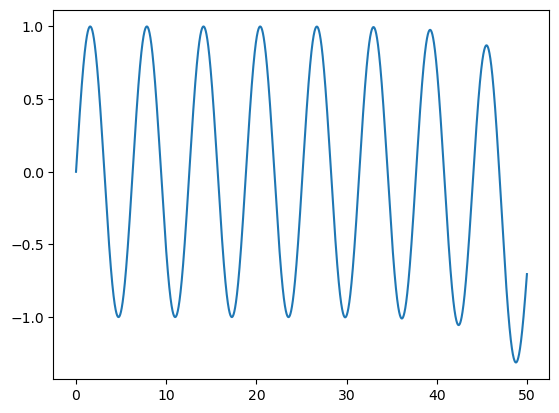

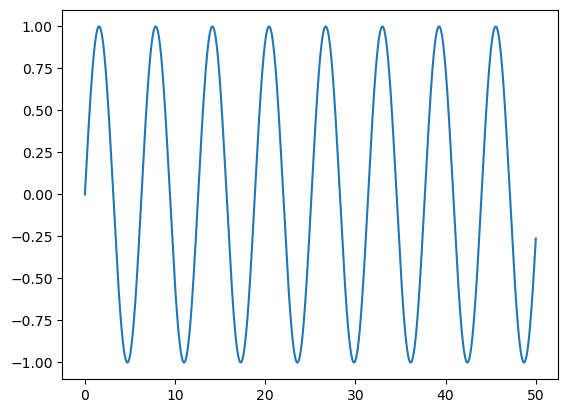

In [2]:
#ddeint test code to make sure it works correctly and I can recapitulate their example on my machine
model = lambda Y,t : Y(t - 3*np.pi/2)

t = np.linspace(0,50,10000) # Time start, time end, nb of points/steps
g = np.sin # Expression of Y(t) before the integration interval
y = ddeint(model,g,t) # Solving

plt.plot(t, y)
plt.show()

plt.plot(t, g(t))
plt.show()

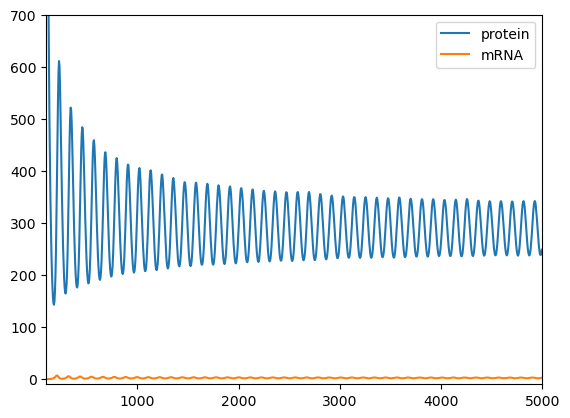

In [ ]:
#define parameters (taken from PNAS paper)
Tp = 8 #translational delay
Tm = 29 #transcriptional delay (variable based on intron length)
rate_translate = 4.5 #rate of translation
transcript_no_inhib = 33 #baseline translation rate without inhibition
P_half_max = 40 #half-maximal protein concentration for feedback inhibition
tauP = 20 #protein half-life (degradation time constant)
tauM = 3 #mRNA half-life (degradation time constant)

#set initial values
Minit = 0 #initial mRNA concentration
Pinit = 0 #initial protein concentration

#define system of ddes
def model(MP, t, Tp, Tm, a, k, Pcrit, tauP, tauM):
    p, m = MP(t) #MP is a vector containing protein concentrations in [0] and mRNA concentrations in [1]
    dm = MP(t - Tp)[1] #use mRNA quantity at an earlier time for protein equation due to translational delay
    dp = MP(t - Tm)[0] #use protein quantity at an earlier time for mRNA due to transcriptional delay
    dmpdt = np.array([ #DDEs from PNAS paper
        (a * dm) - ((np.log(2) / tauP) * p),
        (k / ((1 + (dp / Pcrit)) ** 2)) - ((np.log(2) / tauM) * m)
    ])
    return dmpdt

#initial conditions
g = lambda t:np.array([Pinit,Minit]) #defines values of the function at past times, set them all to Pinit and Minit
#time array
tt = np.arange(0, 5000, 5)
#solve & plot
pm = ddeint(model,g,tt,fargs=(Tp, Tm, rate_translate, transcript_no_inhib, P_half_max, tauP, tauM))
plt.plot(tt, pm[:,0], label = "protein")
plt.plot(tt, pm[:,1], label = "mRNA")
plt.ylim((-10, 700))
plt.xlim((100, 5000))
plt.legend()
plt.show()

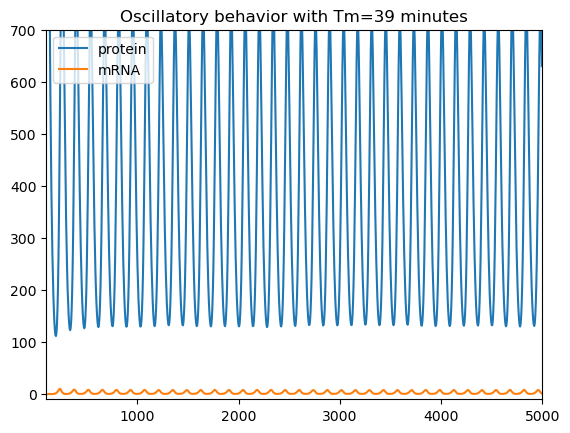

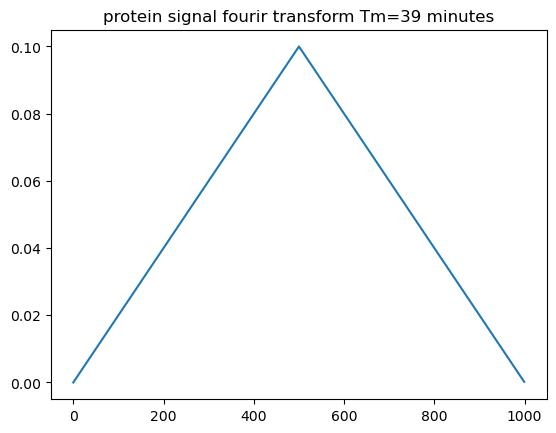

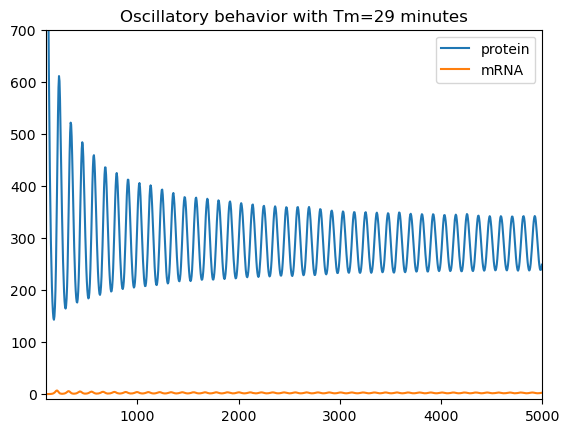

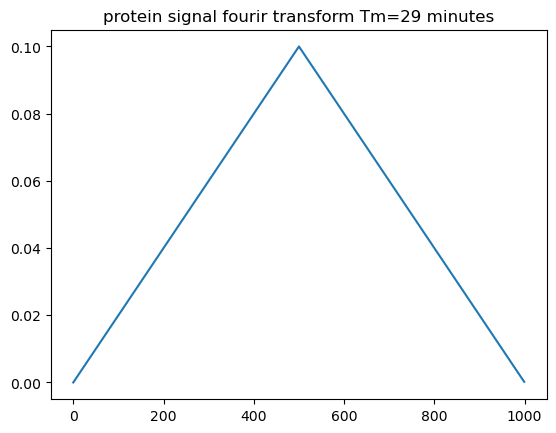

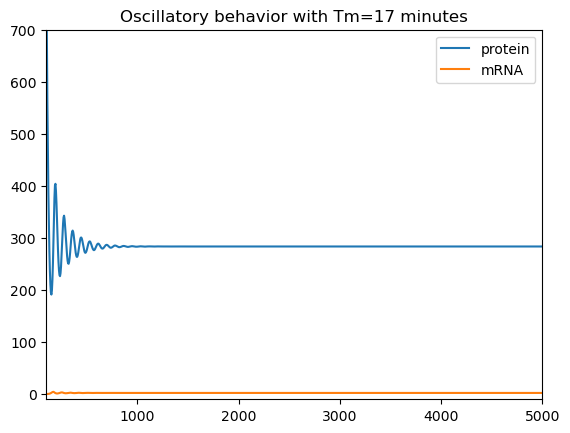

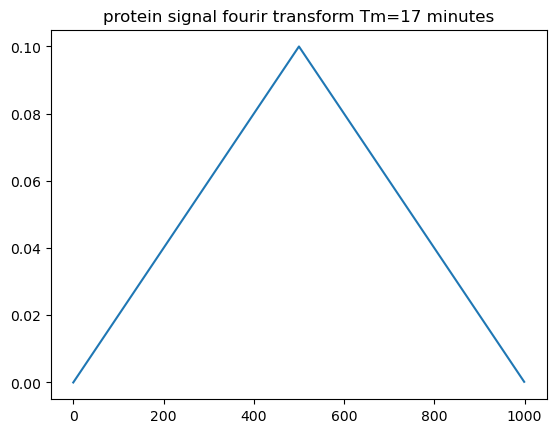

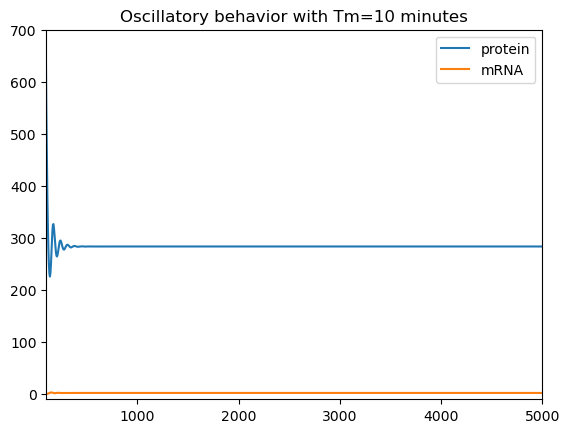

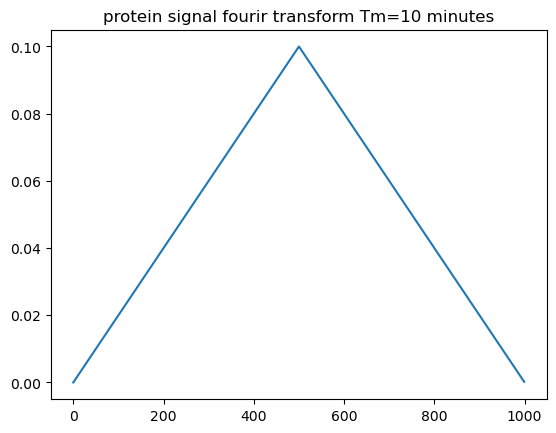

In [ ]:
# Plot oscillatory behavior with different intron lengths
#define parameters (taken from PNAS paper)
Tp = 8 #translational delay
Tm=29 #transcriptional delay
rate_translate = 4.5 #rate of translation
transcript_no_inhib = 33 #baseline translation rate without inhibition
P_half_max = 40 #half-maximal protein concentration for feedback inhibition
tauP = 20 #protein half-life (degradation time constant)
tauM = 3 #mRNA half-life (degradation time constant)

#set initial values
Minit = 0 #initial mRNA concentration
Pinit = 0 #initial protein concentration

#define system of ddes
def model(MP, t, Tp, Tm, a, k, Pcrit, tauP, tauM):
    p, m = MP(t) #MP is a vector containing protein concentrations in [0] and mRNA concentrations in [1]
    dm = MP(t - Tp)[1] #use mRNA quantity at an earlier time for protein equation due to translational delay
    dp = MP(t - Tm)[0] #use protein quantity at an earlier time for mRNA due to transcriptional delay
    dmpdt = np.array([ #DDEs from PNAS paper
        (a * dm) - ((np.log(2) / tauP) * p),
        (k / ((1 + (dp / Pcrit)) ** 2)) - ((np.log(2) / tauM) * m)
    ])
    return dmpdt

#initial conditions
g = lambda t:np.array([Pinit,Minit]) #defines values of the function at past times, set them all to Pinit and Minit
#time array
tt = np.arange(0, 5000, 5)
#solve & plot
Tms = [39,29,17,10] #transcriptional delay (variable based on intron length)
for i in range(len(Tms)):
    pm = ddeint(model,g,tt,fargs=(Tp, Tms[i], rate_translate, transcript_no_inhib, P_half_max, tauP, tauM))
    plt.plot(tt, pm[:,0], label = "protein")
    plt.plot(tt, pm[:,1], label = "mRNA")
    plt.ylim((-10, 700))
    plt.xlim((100, 5000))
    plt.title(f'Oscillatory behavior with Tm={Tms[i]} minutes')
    plt.legend()
    plt.show()

    fourier = np.fft.fft(pm[:,0]) ** 2
    n = pm[:,0].size
    step = 5
    freqs = np.fft.fftfreq(n, d=step)
    idx = np.argsort(freqs)
    plt.plot(freqs[idx], ps[idx])
    plt.title(f"protein signal fourir transform Tm={Tms[i]} minutes")
    plt.show()




 DVODE--  At T(=R1) and step size H(=R2), the error
       test failed repeatedly or with abs(H) = HMIN
      In above,  R1 =  0.2467162276920D+01   R2 =  0.2220446049250D-04
 DVODE--  At T(=R1) and step size H(=R2), the error
       test failed repeatedly or with abs(H) = HMIN
      In above,  R1 =  0.2467162276920D+01   R2 =  0.2220446049250D-04
 DVODE--  At T(=R1) and step size H(=R2), the error
       test failed repeatedly or with abs(H) = HMIN
      In above,  R1 =  0.2467162276920D+01   R2 =  0.2220446049250D-04
 DVODE--  At T(=R1) and step size H(=R2), the error
       test failed repeatedly or with abs(H) = HMIN
      In above,  R1 =  0.2467162276920D+01   R2 =  0.2220446049250D-04


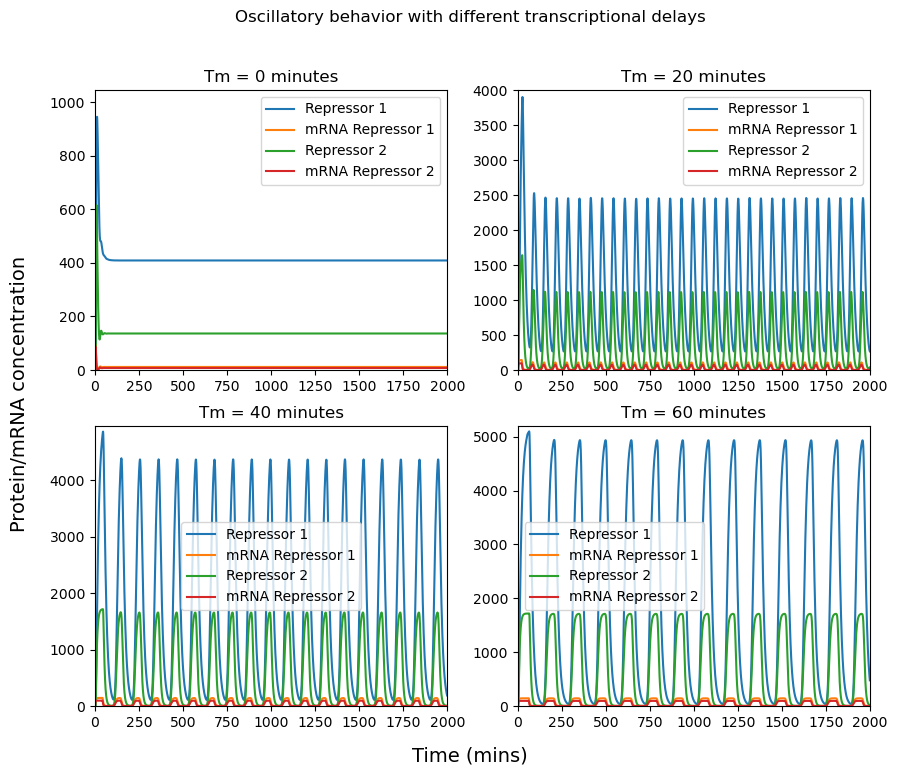

In [ ]:
#repressor + repressor

T_A = 2 #translational delay
T_R = 2

a = 2.5 #rate of translation
r = 2.5

k=33 #baseline translation rate without inhibition, same used for both proteins
Pcrit= 40 #half-maximal protein concentration for feedback inhibition, same used for both proteins

tau_A = 10 # protein half life
tau_mA = 3 #mRNA half life
tau_R = 5
tau_mR = 2

#set initial values
A_init = 0
mA_init = 0
R_init = 0
mR_init = 0

#A,m_A,R,m_R is the order of the things in the vector

def act(p):
    return((k*(p/Pcrit)**2)/(1+(p/Pcrit)**2))
def rep(p):
    return(k / (1 + (p / Pcrit) ** 2))

#define system of ddes
def model2(AMRM, t, T_A,T_mA,T_R,T_mR, a,r, k, Pcrit, tau_A, tau_mA,tau_R,tau_mR):
    A,mA,R,mR=AMRM(t)
    dm_A=AMRM(t-T_A)[1]
    dm_R=AMRM(t-T_R)[3]
    dAMRMdt = np.array([ #DDEs
        (a*dm_A)-((np.log(2)/tau_A)*A),
        rep(AMRM(t-T_mA)[2])-((np.log(2)/tau_mA)*mA),
        (r*dm_R)-((np.log(2)/tau_R)*R),
        rep(AMRM(t-T_mR)[2])-((np.log(2)/tau_mR)*mR)
    ])
    return dAMRMdt

#initial conditions
g = lambda t:np.array([A_init,mA_init,R_init,mR_init]) #defines values of the function at past times
#time array
tt = np.arange(0, 2000, 1)

tms = [0,20,40,60] #transcriptional delay (variable based on intron length)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

for i, ax in enumerate(axes):
    amrm = ddeint(model2, g, tt, fargs=(T_A, tms[i], T_R, tms[i], a, r, k, Pcrit, tau_A, tau_mA, tau_R, tau_mR))

    ax.plot(tt, amrm[:, 0], label="Repressor 1")
    ax.plot(tt, amrm[:, 1], label="mRNA Repressor 1")
    ax.plot(tt, amrm[:, 2], label="Repressor 2")
    ax.plot(tt, amrm[:, 3], label="mRNA Repressor 2")

    ax.set_ylim((0, np.max(amrm)+100))
    ax.set_xlim((0, 2000))
    ax.set_title(f'Tm = {tms[i]} minutes')
    ax.legend()

plt.suptitle("Oscillatory behavior with different transcriptional delays")
fig.text(0.5, 0.04, 'Time (mins)', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Protein/mRNA concentration', va='center', rotation='vertical', fontsize=14)
plt.show()


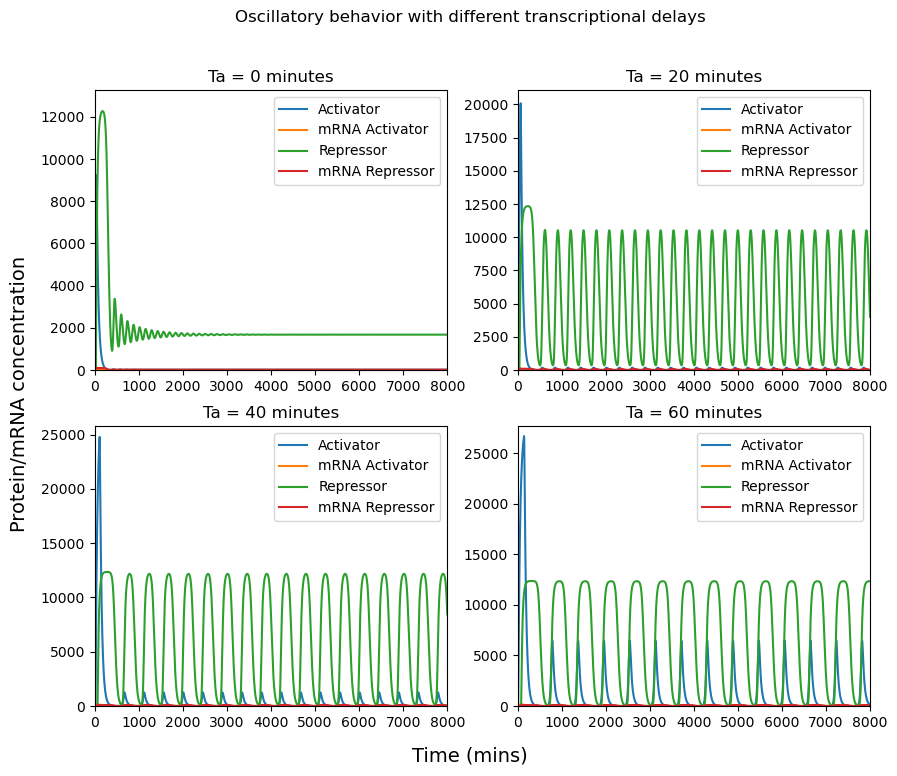

In [ ]:
#activator+repressor

T_A = 8 #translational delay
T_R = 8

a = 4.5 #rate of translation
r = 4.5

k=33 #baseline translation rate without inhibition, same used for both proteins
Pcrit= 40 #half-maximal protein concentration for feedback inhibition, same used for both proteins

tau_A = 30 # protein half life
tau_mA = 3 #mRNA half life
tau_R = 20
tau_mR = 2

#set initial values
A_init = 0
mA_init = 0
R_init = 0
mR_init = 0

#A,m_A,R,m_R is the order of the things in the vector

def act(p):
    return((k*(p/Pcrit)**2)/(1+(p/Pcrit)**2))
def rep(p):
    return(k / (1 + (p / Pcrit) ** 2))


#define system of ddes
def model2(AMRM, t, T_A,T_mA,T_R,T_mR, a,r, k, Pcrit, tau_A, tau_mA,tau_R,tau_mR):
    A,mA,R,mR=AMRM(t)
    dm_A=AMRM(t-T_A)[1]
    dm_R=AMRM(t-T_R)[3]
    dAMRMdt = np.array([ #DDEs
        (a*dm_A)-((np.log(2)/tau_A)*A),
        rep(AMRM(t-T_mA)[2])-((np.log(2)/tau_mA)*mA),
        (r*dm_R)-((np.log(2)/tau_R)*R),
        act(AMRM(t-T_mR)[0])-((np.log(2)/tau_mR)*mR)
    ])
    return dAMRMdt

#initial conditions
g = lambda t:np.array([A_init,mA_init,R_init,mR_init]) #defines values of the function at past times
#time array
tt = np.arange(0, 10000, 1)

tms = [0,20,40,60] #transcriptional delay (variable based on intron length)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

for i, ax in enumerate(axes):
    amrm = ddeint(model2, g, tt, fargs=(T_A, tms[i], T_R, tms[i], a, r, k, Pcrit, tau_A, tau_mA, tau_R, tau_mR))

    ax.plot(tt, amrm[:, 0], label="Activator")
    ax.plot(tt, amrm[:, 1], label="mRNA Activator")
    ax.plot(tt, amrm[:, 2], label="Repressor")
    ax.plot(tt, amrm[:, 3], label="mRNA Repressor")

    ax.set_ylim((0, np.max(amrm)+1000))
    ax.set_xlim((0, 8000))
    ax.set_title(f'Ta = {tms[i]} minutes')
    ax.legend()

plt.suptitle("Oscillatory behavior with different transcriptional delays")
fig.text(0.5, 0.04, 'Time (mins)', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Protein/mRNA concentration', va='center', rotation='vertical', fontsize=14)
plt.show()


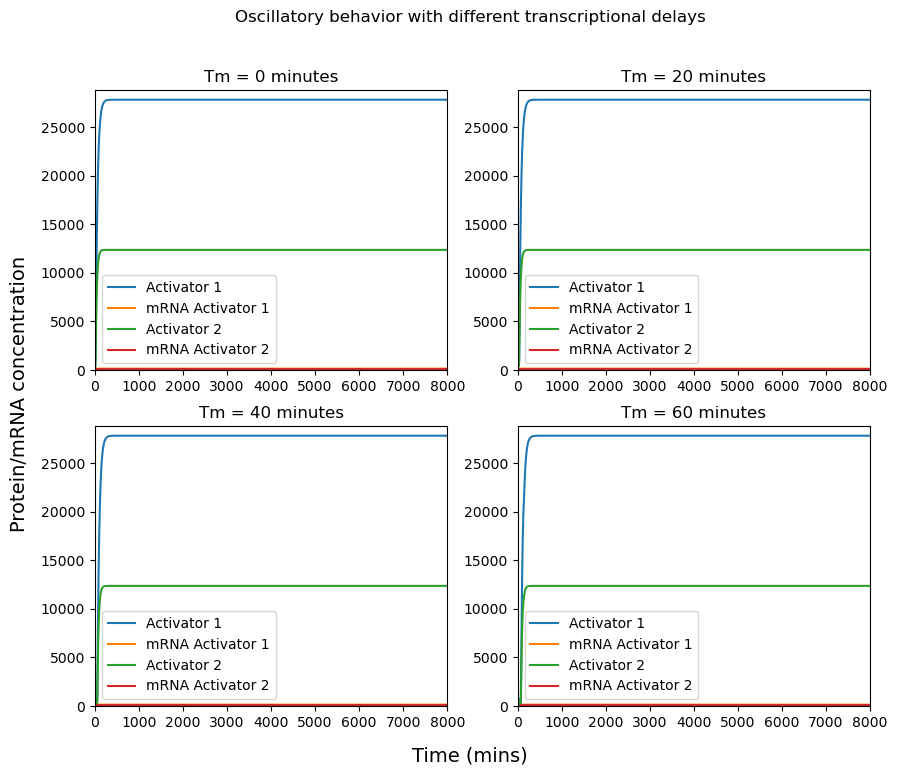

In [ ]:
#activator+activator

T_A = 8 #translational delay
T_R = 8

a = 4.5 #rate of translation
r = 4.5

k=33 #baseline translation rate without inhibition, same used for both proteins
Pcrit= 40 #half-maximal protein concentration for feedback inhibition, same used for both proteins

tau_A = 30 # protein half life
tau_mA = 3 #mRNA half life
tau_R = 20
tau_mR = 2

#set initial values
A_init = 0
mA_init = 20
R_init = 0
mR_init = 20

#A,m_A,R,m_R is the order of the things in the vector

def act(p):
    return((k*(p/Pcrit)**2)/(1+(p/Pcrit)**2))
def rep(p):
    return(k / (1 + (p / Pcrit) ** 2))

#define system of ddes
def model2(AMRM, t, T_A,T_mA,T_R,T_mR, a,r, k, Pcrit, tau_A, tau_mA,tau_R,tau_mR):
    A,mA,R,mR=AMRM(t)
    dm_A=AMRM(t-T_A)[1]
    dm_R=AMRM(t-T_R)[3]
    dAMRMdt = np.array([ #DDEs
        (a*dm_A)-((np.log(2)/tau_A)*A),
        act(AMRM(t-T_mA)[2])-((np.log(2)/tau_mA)*mA),
        (r*dm_R)-((np.log(2)/tau_R)*R),
        act(AMRM(t-T_mR)[0])-((np.log(2)/tau_mR)*mR)
    ])
    return dAMRMdt

#initial conditions
g = lambda t:np.array([A_init,mA_init,R_init,mR_init]) #defines values of the function at past times
#time array
tt = np.arange(0, 10000, 1)

tms = [0,20,40,60] #transcriptional delay (variable based on intron length)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

for i, ax in enumerate(axes):
    amrm = ddeint(model2, g, tt, fargs=(T_A, tms[i], T_R, tms[i], a, r, k, Pcrit, tau_A, tau_mA, tau_R, tau_mR))

    ax.plot(tt, amrm[:, 0], label="Activator 1 ")
    ax.plot(tt, amrm[:, 1], label="mRNA Activator 1")
    ax.plot(tt, amrm[:, 2], label="Activator 2")
    ax.plot(tt, amrm[:, 3], label="mRNA Activator 2")

    ax.set_ylim((0, np.max(amrm)+1000))
    ax.set_xlim((0, 8000))
    ax.set_title(f'Tm = {tms[i]} minutes')
    ax.legend()

plt.suptitle("Oscillatory behavior with different transcriptional delays")
fig.text(0.5, 0.04, 'Time (mins)', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Protein/mRNA concentration', va='center', rotation='vertical', fontsize=14)
plt.show()
